# A3: Frequency Domain Filtering
**CS6640: Image Processing**

**Author: Cade Parkison**

---

**Jupyter Notebook Settings:**

Make the output cells to use compact formatting:

In [6]:
format compact

Plot images in the notebook, as opposed to `%plot native` which uses matlab gui window to plot

In [2]:
%plot inline

In [16]:
%plot native

---

**TODO:**

- Zero Padding
- refactor rings and angular to loop through each pixel first, calcultaing angle or distance, and then looping through segments 

---
**Test Image:**

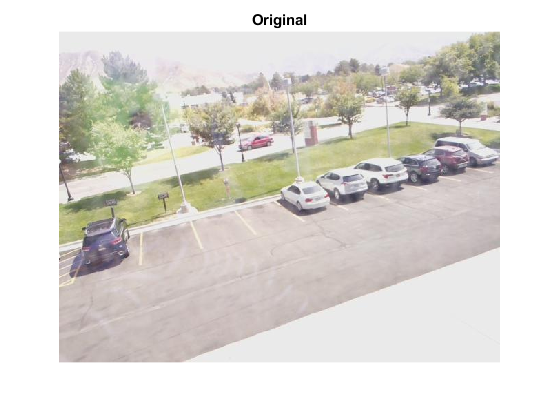

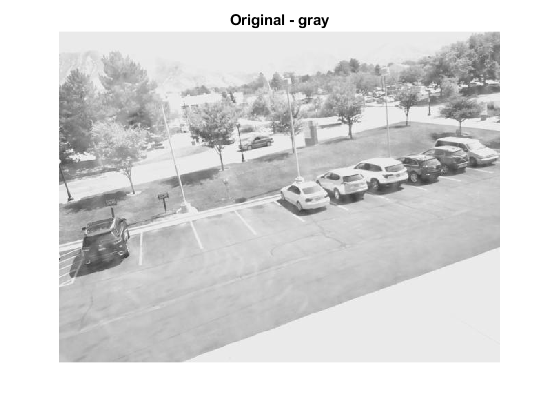

In [2]:
im_rgb = imread('im2.jpg');
im = rgb2gray(im_rgb);
figure(1);imshow(im); title('Original - gray');
figure(2);imshow(im_rgb); title('Original');

---

## Problem 1

Develop a texture feature analysis tool based on the 2D FFT power spectrum. For every 5x5 region in the image, compute the 2D FFT, compute the power spectrum, and use that as a 25-element feature vector. Produce a texture feature array, M*N by 25, and then use kmeans as in A2 to explore the usefulness of this for semantic region analysis (based on texture) in our videos.


#### Functions

In [ ]:
%%file CS6640_FFT_texture.m

function  T = CS6640_FFT_texture(im)
% CS6640_FFT_texture - compute FFT texture parameters
% On input:
%     im (MxN array): input image
% On output:
%     T (M*Nx25 array): texture parameters
%       each texture parameter is a column vector in T
% Call:
%     T = CS6640_FFT_texture(im);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

[M,N] = size(im);
T = zeros(M,N, 25);
window = 5;

for i=3:M-2
    for j=3:N-2
        % get 5x5 window surrounding (i,j)
        w = im(i-2:i+2, j-2:j+2);
        % take FFT of window
        F = fft2(w);
        % get power spectrum of F 
        ps = F.*conj(F);
        % Fill in T at (x,y,t) where t is the texture parameter 1:25
        T(i,j,1:25) = ps(:);
    end
end

% reshape T to (480*640 x 25)
T = reshape(T, M*N, 25);

---
#### Testing

In [30]:
%plot native

In [ ]:
clear all;close all;clc

Calculate Texture parameters and pass them to k-means:

In [29]:
T = CS6640_FFT_texture(im);
[cidx,ctrs] = kmeans(T,7);

Plot the combo images for each k-means parameter:

In [32]:
subplot(4,2,1);combo(mat2gray(im),(reshape(cidx==1,480,640)));title('K=1');
subplot(4,2,2);combo(mat2gray(im),(reshape(cidx==2,480,640)));title('K=2');
subplot(4,2,3);combo(mat2gray(im),(reshape(cidx==3,480,640)));title('K=3');
subplot(4,2,4);combo(mat2gray(im),(reshape(cidx==4,480,640)));title('K=4');
subplot(4,2,5);combo(mat2gray(im),(reshape(cidx==5,480,640)));title('K=5');
subplot(4,2,6);combo(mat2gray(im),(reshape(cidx==6,480,640)));title('K=6');
subplot(4,2,7);combo(mat2gray(im),(reshape(cidx==7,480,640)));title('K=7');
%figure(8);combo(mat2gray(im),(reshape(cidx==8,480,640)));title('K=8');
%figure(9);combo(mat2gray(im),(reshape(cidx==9,480,640)));title('K=9');

In [31]:
figure(1);combo(mat2gray(im),(reshape(cidx==1,480,640)));title('K=1');
figure(2);combo(mat2gray(im),(reshape(cidx==2,480,640)));title('K=2');
figure(3);combo(mat2gray(im),(reshape(cidx==3,480,640)));title('K=3');
figure(4);combo(mat2gray(im),(reshape(cidx==4,480,640)));title('K=4');
figure(5);combo(mat2gray(im),(reshape(cidx==5,480,640)));title('K=5');
figure(6);combo(mat2gray(im),(reshape(cidx==6,480,640)));title('K=6');
figure(7);combo(mat2gray(im),(reshape(cidx==7,480,640)));title('K=7');
%figure(8);combo(mat2gray(im),(reshape(cidx==8,480,640)));title('K=8');
%figure(9);combo(mat2gray(im),(reshape(cidx==9,480,640)));title('K=9');

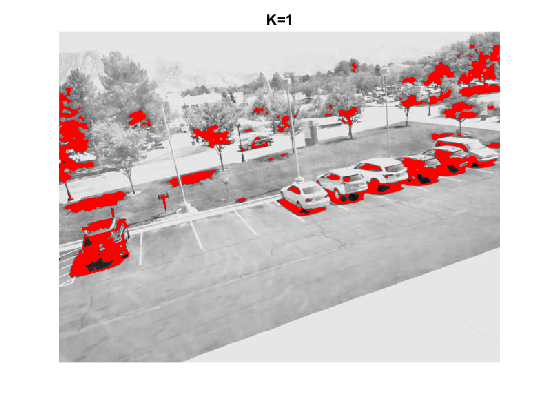

In [23]:
combo(mat2gray(im),(reshape(cidx==1,480,640)));title('K=1');

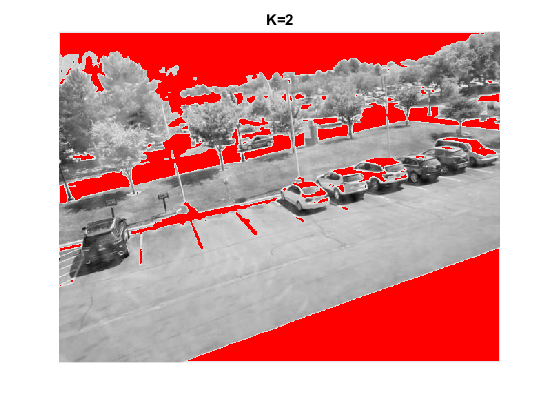

In [24]:
combo(mat2gray(im),(reshape(cidx==2,480,640)));title('K=2');

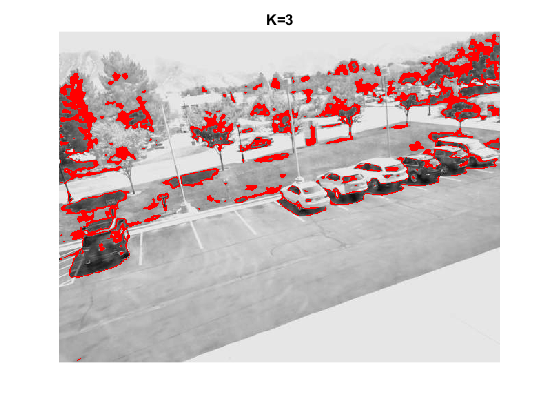

In [6]:
figure(3);combo(mat2gray(im),(reshape(cidx==3,480,640)));title('K=3');

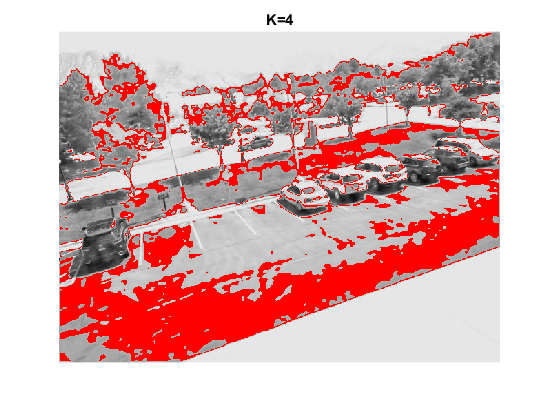

In [7]:
figure(4);combo(mat2gray(im),(reshape(cidx==4,480,640)));title('K=4');

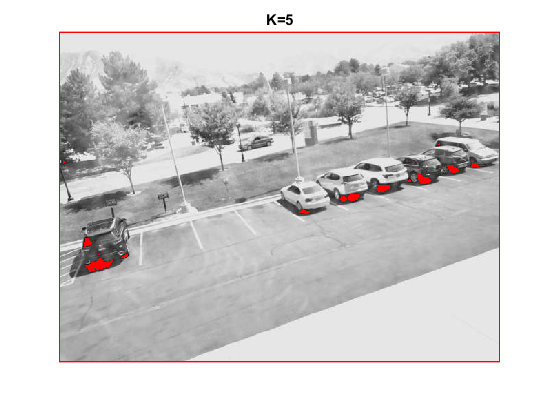

In [8]:
figure(5);combo(mat2gray(im),(reshape(cidx==5,480,640)));title('K=5');

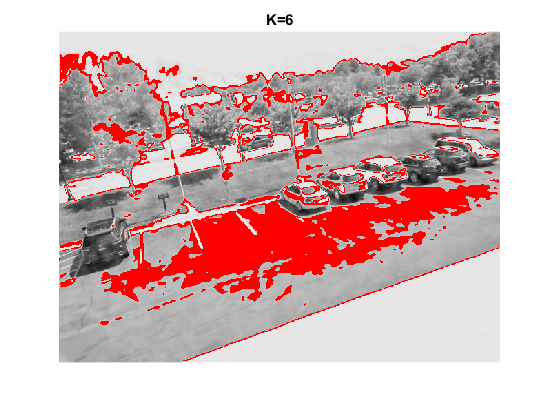

In [9]:
figure(6);combo(mat2gray(im),(reshape(cidx==6,480,640)));title('K=6');

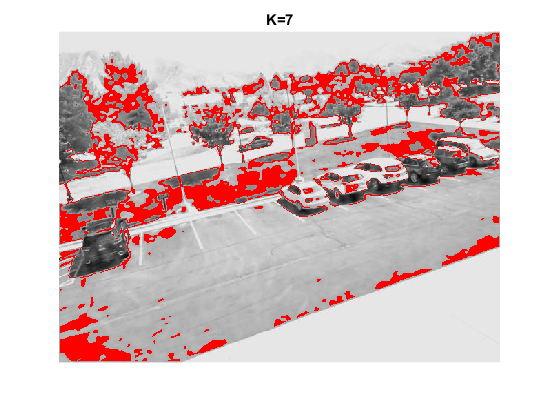

In [10]:
figure(7);combo(mat2gray(im),(reshape(cidx==7,480,640)));title('K=7');

In [11]:
%figure(8);combo(mat2gray(im),(reshape(cidx==8,480,640)));title('K=8');

In [12]:
%figure(9);combo(mat2gray(im),(reshape(cidx==9,480,640)));title('K=9');

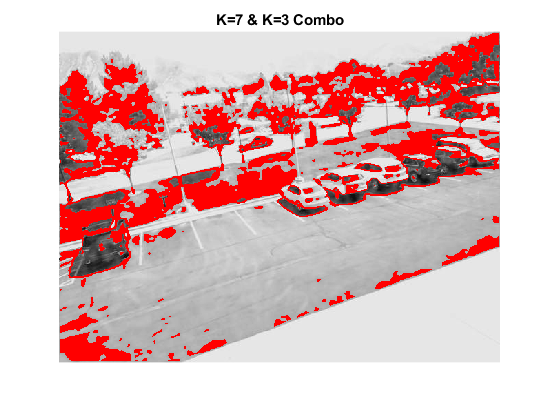

In [15]:
figure(10);combo(mat2gray(im),(reshape(cidx==7|cidx==3,480,640)));title('K=7 & K=3 Combo')

---
## Problem 2

Develop another FFT texture analysis approach based on radial segments
of the power spectrum. A radial feature is defined by a radius pair:

$$ f_{r_1,r_2} = \sum \sum {| F(u, v) |}^2 $$

where $ {r_1}^2 ≤ u^2 + v^2 < {r_2}^2 $. 
Suppose there are 10 such pairs, specified by 10 radii; i.e.:
$ R = \{0, r_1, r_2, . . . , r_10\} $ Produce a texture feature array, M*N by 10, and then use kmeans
as in A2 to explore the usefulness of this for semantic region analysis (based on texture) in
our videos.

#### Functions

In [ ]:
%%file CS6640_rings.m

function rings = CS6640_rings
%  CS6640_rings - computes cell array of linear indices of each ring to be used with the FFT_radial function
%
% On output:
%     rings (cell array) - Structure holding the (x,y) index pairs of each ring
% Call:
%     rings = CS6640_rings;
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

rings = {};
% center
xc = 10; yc = 10;

for r=0:9;
    ring = [];
    rmin = r;
    rmax = r+1;
    for i=1:19
        for j=1:19
            % L-p norm from pixel to center of window
            p = 10;
            x = (xc-i)^p + (yc-j)^p;
            d = nthroot(x, p);
            if d >= rmin
                if d < rmax
                    % find linear index for corresponding (i,j) in the 19x19 matrix
                    ind = sub2ind([19,19], i, j);
                    ring = [ind; ring];
                end
            end
        end
    end
    rings{r+1} = ring; 
end
end

In [ ]:
%%file CS6640_FFT_radial.m

function  T = CS6640_FFT_radial(im)
%  CS6640_FFT_radial - compute FFT radial texture parameters
% On input:
%     im (MxN array): input image
% On output:
%     T (M*Nx10 array): texture parameters
%       each texture parameter is a column vector in T
% Call:
%     T = CS6640_FFT_radial(im);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

[M,N] = size(im);
T = zeros(M,N, 10);

% Cell array of length 10, each element containing list of linear indices for each annulus
rings = CS6640_rings;

for i=10:M-9
    for j=10:N-9
        
        % get 19x19 window surrounding (i,j)
        w = im(i-9:i+9, j-9:j+9);
        % take FFT of window
        F = fft2(w);
        % get power spectrum of F 
        ps = F.*conj(F);
        % Compute Radial segments of ps for each annulus
        ps_radial = zeros(1,10);
        for r=1:10
            ps_r = ps(rings{r});
            % sum square of ps_r
            ps_radial(r) = sum(ps_r.^2);
        end
        
        % Fill in T at (x,y,t) where t is the texture parameter 1:10
        T(i,j,1:10) = ps_radial(:);
    end
end

% reshape T to (480*640 x 10)
T = reshape(T, M*N, 10);

---
#### Testing

In [ ]:
clear all;close all;clc;

Calculate Texture parameters and pass them to k-means:

In [37]:
rings = CS6640_rings;

In [40]:
size(rings)


ans =

     1    10




In [33]:
T_radial = CS6640_FFT_radial(im);
[cidx_r,ctrs_r] = kmeans(T_radial,7);

In [34]:
subplot(4,2,1);combo(mat2gray(im),(reshape(cidx_r==1,480,640)));title('K=1');
subplot(4,2,2);combo(mat2gray(im),(reshape(cidx_r==2,480,640)));title('K=2');
subplot(4,2,3);combo(mat2gray(im),(reshape(cidx_r==3,480,640)));title('K=3');
subplot(4,2,4);combo(mat2gray(im),(reshape(cidx_r==4,480,640)));title('K=4');
subplot(4,2,5);combo(mat2gray(im),(reshape(cidx_r==5,480,640)));title('K=5');
subplot(4,2,6);combo(mat2gray(im),(reshape(cidx_r==6,480,640)));title('K=6');
subplot(4,2,7);combo(mat2gray(im),(reshape(cidx_r==7,480,640)));title('K=7');

Plot the combo images for each k-means parameter:

In [ ]:
figure(1);combo(mat2gray(im),(reshape(cidx_r==1,480,640)));title('K=1');

In [ ]:
figure(2);combo(mat2gray(im),(reshape(cidx_r==2,480,640)));title('K=2');

In [ ]:
figure(3);combo(mat2gray(im),(reshape(cidx_r==3,480,640)));title('K=3');

In [ ]:
figure(4);combo(mat2gray(im),(reshape(cidx_r==4,480,640)));title('K=4');

In [ ]:
figure(5);combo(mat2gray(im),(reshape(cidx_r==5,480,640)));title('K=5');

In [ ]:
figure(6);combo(mat2gray(im),(reshape(cidx_r==6,480,640)));title('K=6');

In [ ]:
figure(7);combo(mat2gray(im),(reshape(cidx_r==7,480,640)));title('K=7');

In [ ]:
%figure(8);combo(mat2gray(im),(reshape(cidx_r==8,480,640)));title('K=8');

In [ ]:
%figure(9);combo(mat2gray(im),(reshape(cidx_r==9,480,640)));title('K=9');

In [ ]:
%figure(10);combo(mat2gray(im),(reshape(cidx_r==1|cidx_r==4,480,640)));

---
## Problem 3

Develop another FFT texture analysis approach based on angular segments of the power spectrum. An angular feature is defined by a angle pair:

$$ f_{θ_1,θ_2} = \sum \sum {| F(u, v) |}^2 $$

where $θ_1 ≤ tan^{−1}(v, u) < θ_2$, and $u^2 + v^2 < L^2$
for some appropriate L. Suppose there
are 8 such segments, specified by 9 angles; i.e.: $A = \{0, ∆, 2∆, . . . , 8∆\}$, where $∆ = 45$ degrees. Produce a texture feature array, M*N by 8 (where these cover ∆θ between the following angles: $\{0, 45, 90, 135, 180, 225, 270, 315, 360\}$, and then use kmeans as in A2 to explore the usefulness of this for semantic region analysis (based on texture) in our videos.

#### Functions


In [4]:
%%file CS6640_angular.m

function segments = CS6640_angular(w)
%  CS6640_rings - computes cell array of linear indices of each angular segment to be used with the FFT_angular function
%
% On Input:
%    w (integer) - window size in pixels, must be odd
% On output:
%     segments (cell array) - Structure holding the (x,y) index pairs of each angular segment
% Call:
%     segments = CS6640_angular;
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

segments = {};

% center of (w x w) window - (xc,yc)
xc = idivide(w, int32(2), 'ceil');
yc = xc;

for a=0:7;
    seg = [];
    % calculate min and max angles (degrees) for each angular segment
    amin = a*45 - 180;
    amax = (a+1)*45 -180;
    for i=1:w
        for j=1:w
            % Calculate angle from center of window to each window pixel
            dx = double(i - xc);
            dy = double(j - yc);
            theta = atan2d(dy,dx);
            if theta >= amin
                if theta < amax
                    % find linear index for corresponding (i,j) in the wxw window matrix
                    ind = sub2ind([w,w], i, j);
                    seg = [ind; seg];
                end
            end
        end
    end
    segments{a+1} = seg; 
end
end

Created file 'C:\Users\cadep\School\CS_6640\A3\CS6640_angular.m'.


In [48]:
%%file CS6640_FFT_angular.m

function  T = CS6640_FFT_angular(im)
%  CS6640_FFT_angular - compute FFT angular texture parameters
% On input:
%     im (MxN array): input image
% On output:
%     T (M*Nx8 array): texture parameters
%       each texture parameter is a column vector in T
% Call:
%     T = CS6640_FFT_angular(im);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

[M,N] = size(im);
T = zeros(M,N, 8);

% Window size W (must be odd number)
W = 11;
% half window
h = double(idivide(W, int32(2), 'floor'));

% Cell array of length 8, each element containing list of (x,y) indices for each angulur segment
segments = CS6640_angular(W);

for i=h+1:M-h
    for j=h+1:N-h
        
        % get w x w window surrounding (i,j)
        window = im(i-h:i+h, j-h:j+h);
        % take FFT of window
        F = fft2(window);
        % get power spectrum of F 
        ps = F.*conj(F);
        % Compute angular segments of ps
        ps_angular = zeros(1,8);
        for s=1:8
            ps_a = ps(segments{s});
            % sum square of ps_a
            ps_angular(s) = sum(ps_a.^2);
        end
        
        % Fill in T at (x,y,t) where t is the texture parameter 1:10
        T(i,j,1:8) = ps_angular(:);
    end
end

% reshape T to (480*640 x 8)
T = reshape(T, M*N, 8);

Created file 'C:\Users\cadep\School\CS_6640\A3\CS6640_FFT_angular.m'.


---
#### Testing

In [49]:
clear all;close all;clc;

In [50]:
im_rgb = imread('im2.jpg');
im = rgb2gray(im_rgb);

Calculate Texture parameters and pass them to k-means:

In [53]:
T_angular= CS6640_FFT_angular(im);
[cidx_a,ctrs_a] = kmeans(T_angular,7);

> In kmeans/loopBody (line 466)
  In internal.stats.parallel.smartForReduce (line 136)
  In kmeans (line 335)



In [54]:
subplot(4,2,1);combo(mat2gray(im),(reshape(cidx_a==1,480,640)));title('K=1');
subplot(4,2,2);combo(mat2gray(im),(reshape(cidx_a==2,480,640)));title('K=2');
subplot(4,2,3);combo(mat2gray(im),(reshape(cidx_a==3,480,640)));title('K=3');
subplot(4,2,4);combo(mat2gray(im),(reshape(cidx_a==4,480,640)));title('K=4');
subplot(4,2,5);combo(mat2gray(im),(reshape(cidx_a==5,480,640)));title('K=5');
subplot(4,2,6);combo(mat2gray(im),(reshape(cidx_a==6,480,640)));title('K=6');
subplot(4,2,7);combo(mat2gray(im),(reshape(cidx_a==7,480,640)));title('K=7');

Plot the combo images for each k-means parameter:

In [ ]:
figure(1);combo(mat2gray(im),(reshape(cidx_a==1,480,640)));title('K=1');

In [ ]:
figure(2);combo(mat2gray(im),(reshape(cidx_a==2,480,640)));title('K=2');

In [ ]:
figure(3);combo(mat2gray(im),(reshape(cidx_a==3,480,640)));title('K=3');

In [ ]:
figure(4);combo(mat2gray(im),(reshape(cidx_a==4,480,640)));title('K=4');

In [ ]:
figure(5);combo(mat2gray(im),(reshape(cidx_a==5,480,640)));title('K=5');

In [ ]:
figure(6);combo(mat2gray(im),(reshape(cidx_a==6,480,640)));title('K=6');

In [ ]:
figure(7);combo(mat2gray(im),(reshape(cidx_a==7,480,640)));title('K=7');

In [ ]:
figure(8);combo(mat2gray(im),(reshape(cidx_a==8,480,640)));title('K=8');

In [ ]:
figure(9);combo(mat2gray(im),(reshape(cidx_a==9,480,640)));title('K=9');

In [ ]:
figure(10);combo(mat2gray(im),(reshape(cidx_a==5|cidx_a==7,480,640)));title('K=5 & K=7');

---
## Problem 4

Develop a Fourier shape descriptor function as described in the Zahn and Roskies paper (in ’lectures’ link from class web page, weeks5-6). I.e., given a shape as a set of connected boundary points:

$$ P = \{(x_i, y_i)\} $$

where i = 1 : N, of a shape (going clockwise), then the angle at each point is computed as:

$$ θ(t) = atan2(y(t + w) − y(t), x(t + w) − x(t)) $$

where w is a distance along the curve. θ is better produced by taking the previous direction,
and adding to it the amount of change in angle to get the current angle. Then produce the
function:

$$ φ(t) = (θ(t) − θ(0))mod2π $$

and

$$ ψ(a) = (φ(\frac{La}{2π}) + a)modπ $$

where ψ is computed over the interval [0, 2π]. Take the FFT of ψ, and if there are 2p Fourier coefficients, use the power of coefficients 2 to p as the shape descriptor (a vector).


#### Functions

In [30]:
%%file CS6640_gen_H.m

function H = CS6640_gen_H
% CS6640_gen_H - generate points on the boundary of letter H
% On input:
%     N/A
% On output:
%     H (43x2 array): x,y locations of boundary
% Call:
%     H = CS6640_gen_H;
% Author:
%     T. Henderson
%     UU
%     Fall 2018
%

H = [2,10; 3,10; 4,10; 4,9; 4,8; 4,7; 5,7; 6,7; 7,7; 7,8; 7,9; 7,10;...
    8,10; 9,10; 9,9; 9,8; 9,7;, 9,6; 9,5; 9,4; 9,3; 9,2; 8,2; 7,2; ...
    7,3; 7,4; 7,5; 6,5; 5,5; 4,5; 4,4; 4,3; 4,2; 3,2; 2,2; 2,3; 2,4;...
    2,5; 2,6; 2,7; 2,8;2,10];

Created file 'C:\Users\cadep\School\CS_6640\A3\CS6640_gen_H.m'.


In [49]:
%%file CS6640_gen_O

function C = CS6640_gen_O
% CS6640_gen_H - generate points on the boundary of letter H
% On input:
%     N/A
% On output:
%     H (43x2 array): x,y locations of boundary
% Call:
%     H = CS6640_gen_H;
% Author:
%     T. Henderson
%     UU
%     Fall 2018
%

C = [6,17; 7, 17; 8,17; 9,17; 10,17; 11,17; 12,17; 13,16; 14,15;...
    15,14; 16,13; 17,12; 17,11; 17,10; 17,9; 17,8; 17,7; 16,6; ...
    15,5; 14,4; 13,3; 13,2; 12,2; 11,2; 10,2; 9,2; 8,2; 7,2; 6,3;...
    5,4; 4,5; 3,6; 2,6; 2,7; 2,8; 2,9; 2,10; 2,11; 2,12; 3,13; ...
    4,14; 5,15; 6,16; 7,17];


Created file 'C:\Users\cadep\School\CS_6640\A3\CS6640_gen_O'.


In [46]:
%%file CS6640_FFT_shape.m

function  X = CS6640_FFT_shape(Z,w)
%  CS6640_FFT_shape - compute Fourier shape descriptors for a curve
% On input:
%     Z (Nx2 array): input curve (should be closed)
%     w (int): distance along curve to determine angles
% On output:
%     X ((N/2-1)x1 vector): the Fourier coefficients for the curve
% Call:
%     X = CS6640_FFT_shape(curve,2);
% Author:
%     Cade Parkison
%     UU
%     Fall 2018
%

s = size(Z);
N = s(1);
theta = zeros(1,N);

for i=1:N-1
    p1 = Z(i,:);
    p2 = Z(i+1,:);
    t = atan2((p2(2)-p1(2)),(p2(1)-p1(1)));
    theta(i) = t;
end

phi = zeros(1,N);
for i=1:N
    phi_rad = theta(i) - theta(1);
    % wrap to interval [0, 2*pi]
    phi(i) = phi_rad - 2*pi*floor(phi_rad/(2*pi));
end

psi = zeros(1,N);

F = fft(phi);

% getting rid of the DC component as well as the symmetric values
X = F(2:N/2);

Created file 'C:\Users\cadep\School\CS_6640\A3\CS6640_FFT_shape.m'.


In [40]:
length(a)

ans =
    10



In [41]:
a = 1:10
b = a(2:length(a)/2)

a =
     1     2     3     4     5     6     7     8     9    10
b =
     2     3     4     5



#### Testing

In [47]:
clear all;close all;clc;

In [48]:
H = CS6640_gen_H;
O = CS6640_gen_O;
size(O), size(H)

ans =
    44     2
ans =
    42     2



In [66]:
X1 = CS6640_FFT_shape(H,2);

bar(abs(X1))
title('Magnitude of "H" Shape Descriptors')

In [67]:
X2 = CS6640_FFT_shape(O,2);

bar(abs(X2))
title('Magnitude of "O" Shape Descriptors')

**TODO:**

- psi function

In [65]:
scatter(H(:,1), H(:,2), 25, 'red', 'filled')
xlim([0 12]);
ylim([0 12]);

In [64]:
scatter(O(:,1), O(:,2), 25, 'blue', 'filled')
xlim([0 18]);
ylim([0 18]);